In [9]:
import pandas as pd
df = pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [10]:
# 와인의 질 값을 0에서 5 사이의 값으로 매핑
quality_mapping = {
    3:0,
    4:1,
    5:2,
    6:3,
    7:4,
    8:5
}

# 판다스의 map 함수를 사용하여 주어진 열의 값을 사전에 정의된 값으로 매핑할 수 있음
df.loc[:, 'quality'] = df.quality.map(quality_mapping)
df.quality.value_counts()

2    681
3    638
4    199
1     53
5     18
0     10
Name: quality, dtype: int64

In [11]:
# sample 함수에 frac=1을 적용하여 데이터프레임을 섞는다.
# 이 과정이 인덱스 값을 변경하므로 인덱스를 reset 한다.
df = df.sample(frac = 1).reset_index(drop = True)

# 첫 1000 샘플을 학습용으로 선택한다.
df_train = df.head(1000)

# 나머지 샘플을 시험/검증용으로 선택한다.
df_test = df.tail(599)

In [12]:
# 모듈 불러오기
from sklearn import tree
from sklearn import metrics

# 의사결정트리 모델 클래스를 초기화
# 파라미터는 max_depth만을 사용하며 3으로 지정
clf = tree.DecisionTreeClassifier(max_depth = 3)

# 학습에 사용할 변수 설정
cols = ['fixed acidity',
       'volatile acidity',
       'citric acid',
       'residual sugar',
       'chlorides',
       'free sulfur dioxide',
       'total sulfur dioxide',
       'density',
       'pH',
       'sulphates',
       'alcohol']

# 선택한 변수들과 앞에서 매핑한 와인의 질의 값으로 모델을 학습
clf.fit(df_train[cols], df_train.quality)

DecisionTreeClassifier(max_depth=3)

In [14]:
# 학습 데이터에 대한 예측값 생성
train_pred = clf.predict(df_train[cols])

# 평가 데이터에 대한 예측값 생성
test_pred = clf.predict(df_test[cols])

# 학습 데이터 예측 값의 정확도를 계산
train_acc = metrics.accuracy_score(
df_train.quality, train_pred)

# 평가 데이터 예측 값의 정확도 계산
test_acc = metrics.accuracy_score(
df_test.quality, test_pred)

print('학습 데이터 정확도 :', train_acc)
print('평가 데이터 정확도 :', test_acc)

학습 데이터 정확도 : 0.583
평가 데이터 정확도 : 0.5442404006677797


In [15]:
# 모듈 불러오기
from sklearn import tree
from sklearn import metrics

# 의사결정트리 모델 클래스를 초기화
# 파라미터는 max_depth만을 사용하며 7으로 지정
clf = tree.DecisionTreeClassifier(max_depth = 7)

# 학습에 사용할 변수 설정
cols = ['fixed acidity',
       'volatile acidity',
       'citric acid',
       'residual sugar',
       'chlorides',
       'free sulfur dioxide',
       'total sulfur dioxide',
       'density',
       'pH',
       'sulphates',
       'alcohol']

# 선택한 변수들과 앞에서 매핑한 와인의 질의 값으로 모델을 학습
clf.fit(df_train[cols], df_train.quality)

DecisionTreeClassifier(max_depth=7)

In [16]:
# 학습 데이터에 대한 예측값 생성
train_pred = clf.predict(df_train[cols])

# 평가 데이터에 대한 예측값 생성
test_pred = clf.predict(df_test[cols])

# 학습 데이터 예측 값의 정확도를 계산
train_acc = metrics.accuracy_score(
df_train.quality, train_pred)

# 평가 데이터 예측 값의 정확도 계산
test_acc = metrics.accuracy_score(
df_test.quality, test_pred)

print('학습 데이터 정확도 :', train_acc)
print('평가 데이터 정확도 :', test_acc)

학습 데이터 정확도 : 0.759
평가 데이터 정확도 : 0.5876460767946577


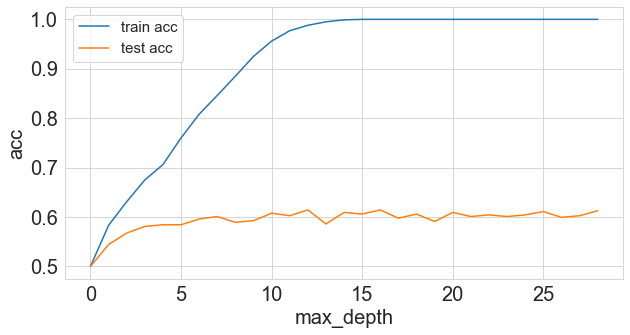

In [21]:
# max_depth에 따른 정확도 확인
from sklearn import tree
from sklearn import metrics
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프의 텍스트 크기를 설정한다.
matplotlib.rc('xtick', labelsize = 20)
matplotlib.rc('ytick', labelsize = 20)
%matplotlib inline

train_accs = [0.5]
test_accs = [0.5]

# depth를 3부터 30까지 정하기
for depth in range(3,31):
    # 모델 초기화
    clf = tree.DecisionTreeClassifier(max_depth = depth)
    
    # 루프 밖에서 설정 가능
    # 학습에 사용할 변수 설정
    cols = ['fixed acidity',
       'volatile acidity',
       'citric acid',
       'residual sugar',
       'chlorides',
       'free sulfur dioxide',
       'total sulfur dioxide',
       'density',
       'pH',
       'sulphates',
       'alcohol']

    # 선택한 변수들과 앞에서 매핑한 와인의 질의 값으로 모델을 학습
    clf.fit(df_train[cols], df_train.quality)
    
    # 예측값 생성
    train_pred = clf.predict(df_train[cols])
    test_pred = clf.predict(df_test[cols])
    
    # 정확도 계산
    train_acc = metrics.accuracy_score(
    df_train.quality, train_pred)
    test_acc = metrics.accuracy_score(
    df_test.quality, test_pred)
    
    # 정확도 리스트에 추가
    train_accs.append(train_acc)
    test_accs.append(test_acc)
    
# 그래프 그리기
plt.figure(figsize = (10,5))
sns.set_style('whitegrid')
plt.plot(train_accs, label = 'train acc')
plt.plot(test_accs, label = 'test acc')
plt.legend(loc = 'upper left', prop = {'size':15})
plt.xticks(range(0, 26,5))
plt.xlabel('max_depth', size = 20)
plt.ylabel('acc', size = 20)
plt.show()

In [ ]:
# 교차검증
import pandas as pd
from sklearn import model_selection

if __name__ == "__main__":
    # 학습 데이터
    df = pd.read_csv('train.csv')
    
    # kfold라는 새로운 열을 생성하고 -1로 채운다.
    df['kfold'] = -1
    
    # 다음 단계는 데이터의 행을 랜덤하게 섞는 것이다.
    df = df.sample(frac = 1).reset_index(drop = True)
    
    # model selection 모듈의 kfold 클래스를 초기화한다.
    kf = model_selection.KFold(n_splits = 5)
    
    # kfold 열을 폴드 아이디로 설정한다.
    for fold, (trn_, val_) in enumerate(kf.split(X=df)):
        df.loc[val_, 'kfold'] = fold
    
    # 데이터를 kfold 열과 함께 새로운 csv 파일로 저장한다.
    df.to_csv('train_folds.csv', index = False)
    
## 이 코드는 거의 모든 종류의 데이터에 사용할 수 있다. 예를 들어 이미지 데이터의 경우, 이미지 아이디, 
## 파일위치, 레이블을 CSV 파일에 저장한 후, 위 코드를 사용하여 k-폴드 교차검증 인덱스 값을 저장한다.


In [ ]:
# 계층별 k-fold 교차검증
import pandas as pd
from sklearn import model_selection

if __name__ == "__main__":
    # 학습 데이터
    df = pd.read_csv('train.csv')
    
    # kfold라는 새로운 열을 생성하고 -1로 채운다.
    df['kfold'] = -1
    
    # 다음 단계는 데이터의 행을 랜덤하게 섞는 것이다.
    df = df.sample(frac = 1).reset_index(drop = True)
    
    # model selection 모듈의 kfold 클래스를 초기화한다.
    kf = model_selection.StratifiedKFold(n_splits = 5)
    
    # kfold 열을 폴드 아이디로 설정한다.
    for fold, (trn_, val_) in enumerate(kf.split(X=df, y=y)):
        df.loc[val_, 'kfold'] = f
    
    # 데이터를 kfold 열과 함께 새로운 csv 파일로 저장한다.
    df.to_csv('train_folds.csv', index = False)

Text(0, 0.5, 'count')

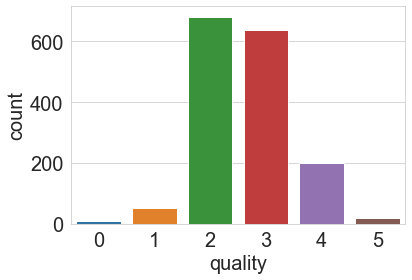

In [23]:
# 레드와인 데이터의 타겟 변수 분포를 보자
b = sns.countplot(x = 'quality', data = df)
b.set_xlabel('quality', fontsize = 20)
b.set_ylabel('count', fontsize = 20)

## 타겟 변수의 분포가 치우쳐져 있음을 알 수 있다.

In [ ]:
# 회귀분석에서의 계층 k-폴드 예제
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn import model_selection

def create_folds(data):
    # kfold라는 새로운 열을 생성하고 -1로 채운다.
    data['kfold'] = -1
    
    # 데이터의 행을 랜덤하게 섞는다.
    data = data.sample(frac=1).reset_index(drop = True)
    
    # Sturge 룰로 타겟 변수를 나눌 그룹의 개수를 계산한다.
    # 여기서는 floor를 사용했지만 round를 사용할 수도 있다.
    num_bins = int(np.floor(1+np.log2(len(data)))).astype(np.int32)
    
    # 타겟 변수를 그룹으로 나눈다.
    data.loc[:, 'bins'] = pd.cut(
    data['target'], bins = num_bins, labels = False)
    
    # model selection 모듈의 kfold 클래스를 초기화한다.
    kf = model_selection.StratifiedKFold(n_splits = 5)
    
    # kfold 열을 채운다.
    # 원래 타겟 변수 값이 아닌 그룹 인덱스를 사용한다.
    for f, (t_, v_) in enumerate(kf.split(X = data,
                                         y = data.bins.values)):
        data.loc[v_, 'kfold'] = f
        
    # 중간 과정에서 사용한 bins 열을 삭제한다.
    data = data.drop('bins', axis = 1)
    # 폴드 값을 추가한 데이터프레임을 반환한다.
    return data

if __name__ == '__main__':
    # 타겟 변수 1개, 피쳐 100개로 구성된 샘플 15000개의 샘플 데이터를 생성한다.
    X, y = datasets.make_regression(
    n_samples = 15000, n_features = 100, n_targets = 1)
    
    # numpy 행렬로부터 데이터프레임을 생성한다.
    df = np.DataFrame(
    X,
    columns = [f"f_{i}" for i in range(X.shape[1])])
    df.loc[:, 'target'] = y
    
    # 폴드를 생성한다.
    df = create_folds(df)